In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [19]:
data = pd.read_csv('/content/spam.csv')


In [20]:
data.head()

,text,label
0,Get a free iPhone now,SPAM
1,"Congratulations, you've won a prize!",SPAM
2,Meeting rescheduled for tomorrow,NON SPAM
3,Can you please send me the report?,NON SPAM
4,Urgent: Claim your gift card today!,SPAM


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20 non-null     object
 1   label   20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [23]:
# Create and train a Naive Bayesian classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)


In [24]:
 # Calculate and print accuracy, precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', labels=[ 'SPAM'])
recall = recall_score(y_test, y_pred, average='weighted', labels=[ 'SPAM'])
confusion = confusion_matrix(y_test, y_pred)


In [25]:

print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 75.0
Precision: 1.0
Recall: 0.5
Confusion Matrix:
[[2 0]
 [1 1]]


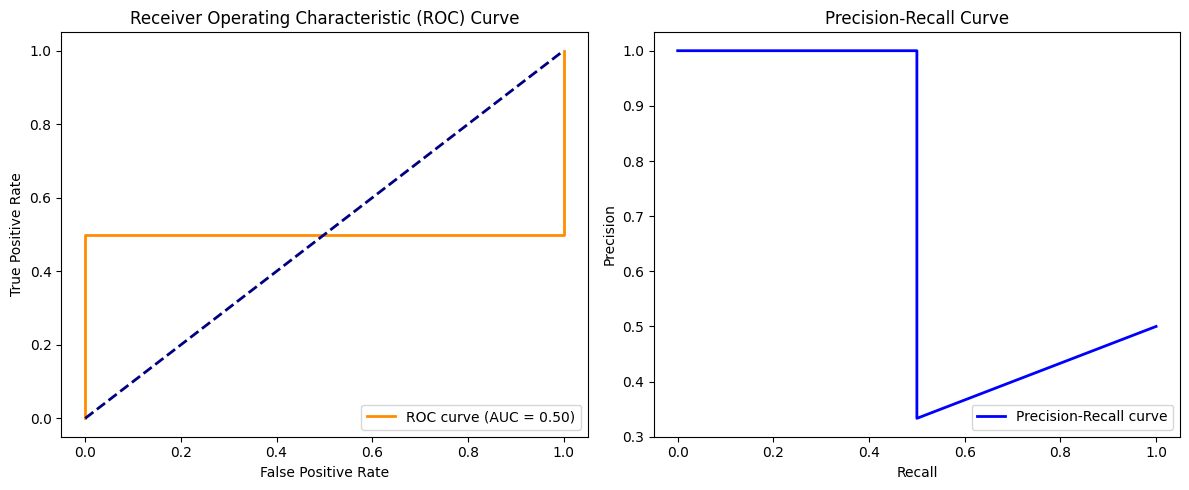

In [26]:
# Function to plot ROC curve and Precision-Recall curve
def plot(y_test, y_pred_prob, pos_label):
    # Map labels to 0 and 1
    y_test_binary = (y_test == pos_label).astype(int)

    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob[:, 1])
    precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_prob[:, 1])

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

# Call the function with the true labels, predicted probabilities, and the positive class label
plot(y_test, nb_classifier.predict_proba(X_test), 'SPAM')


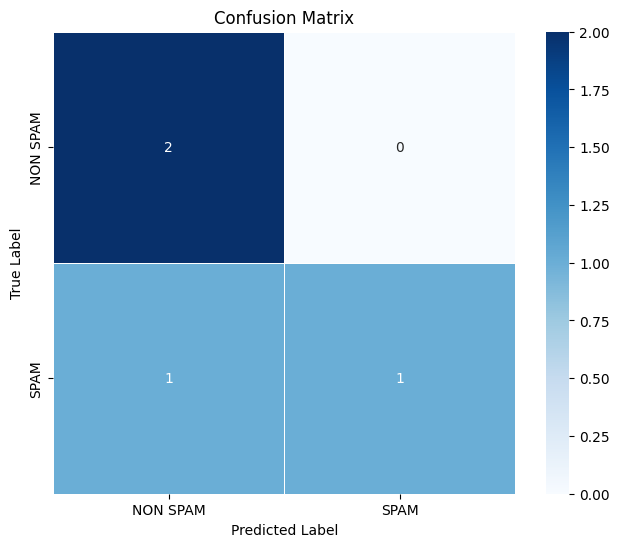

In [27]:

# Function to plot a confusion matrix heatmap
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function with the confusion matrix and classes
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix, ['NON SPAM', 'SPAM'])
